# Hello Home A Local Real Estate Agency of King County 

**Authors:** Monique Hercules 
***

## Overview


An analysis of a local real estate agency in King County for insights on renovation projects to increase home sales. With the knowledge acquired we will be able to predict what type of renovation will impact the sale price of home the best. 

These new insights will help predict the sale budget as well as 

The dataset in use will be from King County. 

## Business Problem

Our stakeholder are local real estate agency that help homeowners buy/sell homes. We will provide evidencial advice about how a  home renovation might increase the estimated value of their homes and by what amount. By targeting this information the real es
tate agency will have highier KPI's 

## Data Understanding 

Import revelant libraries, and inspect data 

In [2]:

import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Exploratory Data Analysis for Understanding the Distribution of the Dataset

Checking for Linearity relation for the target variable "Price"

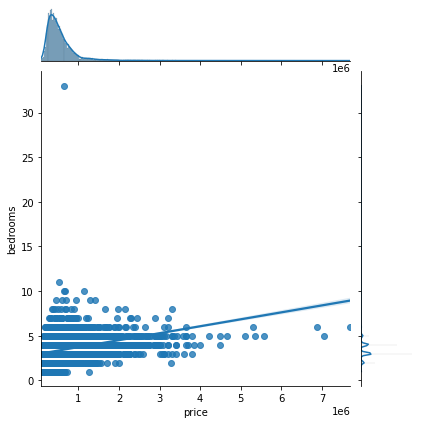

In [4]:
sns.jointplot(x='price',y='bedrooms' , data=df, kind='reg')
#A linear relation 

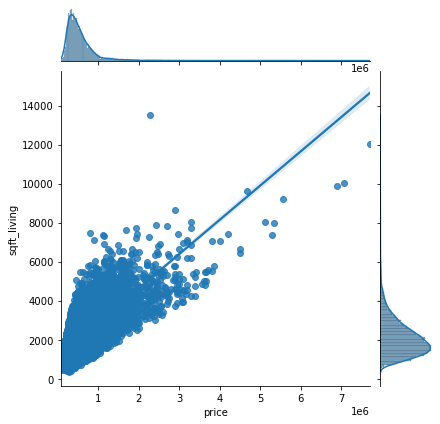

In [5]:
sns.jointplot(x='price', y='sqft_living', data=df, kind='reg' )
#Some Linear Relation 

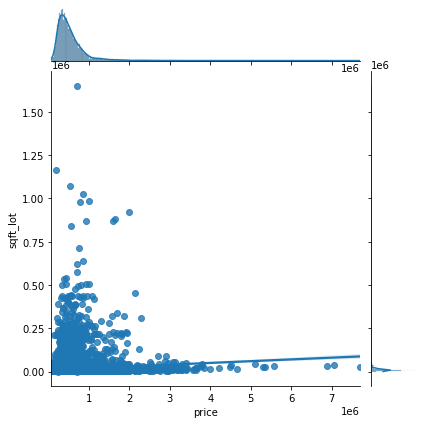

In [6]:
sns.jointplot(x='price', y='sqft_lot', data=df, kind='reg' )
#slight linear relation 

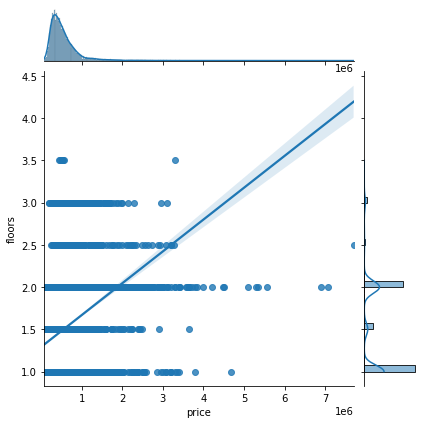

In [7]:
sns.jointplot(x='price', y='floors', data=df, kind='reg' )
#No linear relation 

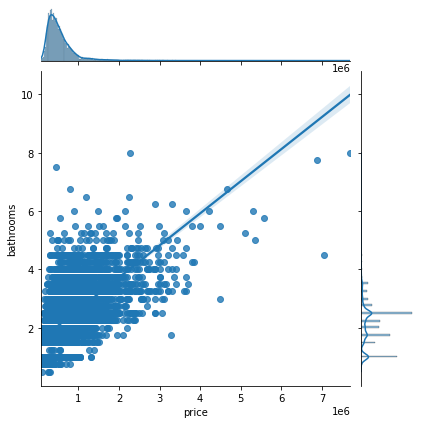

In [8]:
sns.jointplot(x='price', y='bathrooms', data=df, kind='reg')
#Some linear relation 

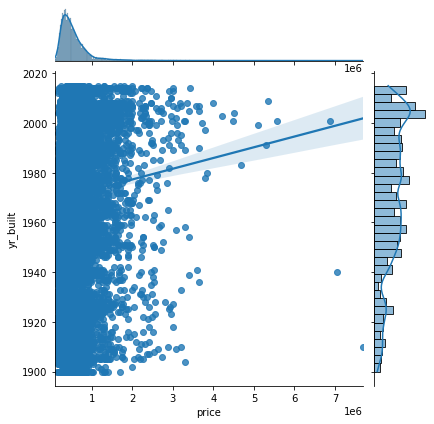

In [9]:
sns.jointplot(x='price', y='yr_built', data=df, kind='reg')
#No Linear relation

Used to identify data that has missing data and to determine which data type is each column 

## Cleaning Data 

Fixing issues wrong with data before modeling, for better accuracy. 

## Checking Data Types 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Dropping irrelevant columns 

In [11]:
dropped_df = df.drop(columns=['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])
dropped_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [12]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [13]:
# bedroom count must be greater than 1
df_cleaned = dropped_df.loc[df['bedrooms'] > 0]
df_cleaned = dropped_df.loc[dropped_df['bathrooms'] >= 1]
df_cleaned = dropped_df.loc[dropped_df['price'] >= 0]

#cleanig
df_cleaned = df_cleaned.iloc[:,:] 
df_cleaned.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


In [14]:
df_cleaned = df_cleaned.loc[df_cleaned['waterfront'].notna()]
df_cleaned.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001


In [15]:
df_cleaned.shape

(19221, 11)

### Checking for missing values 

In [16]:
df_cleaned.isna().sum()
#All the columns that have null values are not going to be used, but dropped earlier on  

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [17]:
df_cleaned.shape 

(19221, 11)

## Checking for multicollinearity 

In [18]:
feats = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
corr = df_cleaned[feats].corr()
corr
# Does Multicollinearity exists between the house features 


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
bedrooms,1.000000,0.516188,0.578211,0.029407,0.182396,0.157512
bathrooms,0.516188,1.000000,0.756341,0.085094,0.506214,0.507014
sqft_living,0.578211,0.756341,1.000000,0.173345,0.357184,0.317443
sqft_lot,0.029407,0.085094,0.173345,1.000000,-0.007246,0.055873
floors,0.182396,0.506214,0.357184,-0.007246,1.000000,0.490252
yr_built,0.157512,0.507014,0.317443,0.055873,0.490252,1.000000


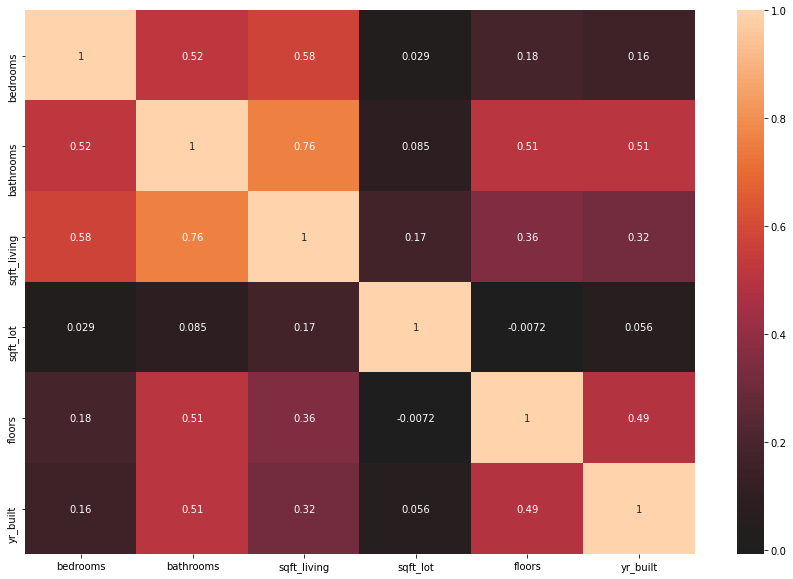

In [19]:
_, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, center=0, annot=True, ax=ax);
#Need to add analysis 

## Normalizing the Data 

## Determining Numeric and Catagorical features

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19221 non-null  int64  
 1   price        19221 non-null  float64
 2   bedrooms     19221 non-null  int64  
 3   bathrooms    19221 non-null  float64
 4   sqft_living  19221 non-null  int64  
 5   sqft_lot     19221 non-null  int64  
 6   floors       19221 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    19221 non-null  object 
 9   grade        19221 non-null  object 
 10  yr_built     19221 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


### Normalizing Numerical Features

In [21]:
numeric_feats = ['bedrooms','bathrooms','sqft_living','sqft_lot','yr_built']

def norm_feat(series):
    return (series - series.mean())/series.std()

# Explain
for feat in numeric_feats:
    df_cleaned[feat] = norm_feat(df_cleaned[feat])
df_cleaned.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,1.922100e+04,1.922100e+04,1.922100e+04,1.922100e+04,1.922100e+04,1.922100e+04,19221.000000,1.922100e+04
mean,4.592301e+09,5.416398e+05,2.425035e-16,1.892710e-16,-2.425035e-16,-1.922284e-17,1.495031,3.856398e-15
std,2.876995e+09,3.722478e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.540155,1.000000e+00
min,1.000102e+06,7.800000e+04,-2.557396e+00,-2.101251e+00,-1.856193e+00,-3.565587e-01,1.000000,-2.417581e+00
25%,2.124049e+09,3.220000e+05,-4.034749e-01,-4.769801e-01,-7.071969e-01,-2.458214e-01,1.000000,-6.819815e-01
50%,3.905081e+09,4.500000e+05,-4.034749e-01,1.727282e-01,-1.760574e-01,-1.826128e-01,1.500000,1.347710e-01
75%,7.334501e+09,6.440000e+05,6.734854e-01,4.975824e-01,5.068362e-01,-1.067626e-01,2.000000,8.834608e-01
max,9.900000e+09,7.700000e+06,3.190533e+01,7.644374e+00,1.241954e+01,4.008804e+01,3.500000,1.496025e+00


In [22]:
#Saved cleaned data 
df_cleaned.to_csv("data/kc_house_data_cleaned.csv", index=False)

 ## One Hot Encoding

In [31]:
categorical_feats = ['floors']
df_categorical_cleaned = df_cleaned[categorical_feats]
df_categorical_cleaned = pd.get_dummies(df_categorical_cleaned, drop_first=True)
df_categorical_cleaned.head()


,floors
1,2.0
2,1.0
3,1.0
4,1.0
5,1.0


Merging the normalized data frames 

In [32]:
normalized_df = pd.merge(df_cleaned,df_categorical_cleaned)
normalized_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [33]:
normalized_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,6414100192,538000.0,-0.403475,0.172728,0.528515,-0.191874,2.0,NO,Average,7 Average,-0.681982
1,6414100192,538000.0,-0.403475,0.172728,0.528515,-0.191874,2.0,NO,Average,7 Average,-0.681982
2,6414100192,538000.0,-0.403475,0.172728,0.528515,-0.191874,2.0,NO,Average,7 Average,-0.681982
3,6414100192,538000.0,-0.403475,0.172728,0.528515,-0.191874,2.0,NO,Average,7 Average,-0.681982
4,6414100192,538000.0,-0.403475,0.172728,0.528515,-0.191874,2.0,NO,Average,7 Average,-0.681982


## Modeling 

Fitting the Initial Model 

In [35]:
outcome = 'price'
x_cols = ['bathrooms','bedrooms','sqft_living','sqft_lot','floors', 'yr_built']
#change x_cols for intial model 

In [36]:
from statsmodels.formula.api import ols 

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=normalized_df).fit()
model.summary()

## Initial Refinement 

In [304]:
outcome = 'price'
x_cols = ['bathrooms','bedrooms', 'floors']
#change x_cols for intial refinement model 
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=normalized_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     2492.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        22:42:13   Log-Likelihood:            -2.7067e+05
No. Observations:               19221   AIC:                         5.413e+05
Df Residuals:                   19217   BIC:                         5.414e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.482e+05   7699.375     71.194      0.000    5.33e+05    5.63e+05
bathrooms   1.878e+05   3050.435     61.571      0.000    1.82e+05    1.94e+05
bedrooms    1.875e+04   2675.602      7.006      0.000    1.35e+04     2.4e+04
floors     -4356.1927   4919.318     -0.886      0.376    -1.4e+04    5286.102
==============================================================================
Omnibus:                    15662.457   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           853478.352
Skew:                           3.540   Prob(JB):                         0.00
Kurtosis:                      34.868   Cond. No.                         7.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking for Mulitcollinearity for initial model 

In [262]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [263]:
X = normalized_df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols, vif))
#change for the original one 

[('bathrooms', 15.282206982427487),
 ('bedrooms', 11.565422775857341),
 ('floors', 9.500174005494687)]

In [ ]:
outcome = 'price'
x_cols = ['bathrooms','sqft_living','sqft_lot', 'floors']
#change x_cols for refinement model 
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=normalized_df).fit()
model.summary()

In [ ]:
X = normalized_df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols, vif))
#change for the new one 

In [ ]:
outcome = 'price'
x_cols = ['sqft_living','sqft_living', 'bedrooms']
#change x_cols for refinement model 2 
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=normalized_df).fit()
model.summary()

## Check for Normality 

In [ ]:
import statsmodels.api as sm 
import scipy.stats as stats 

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True )

## Checking for Homoscedasticity 

In [ ]:
plt.scatter(model.predict(normalized_df[x_cols]), model.resid)
plt.plot(model.predict(normalized_df[x_cols]),[0 for i in range(len(normalized_df))])

## Data Modeling


## Model Refinement 3 

In [ ]:
#Finding a cutoff point 
for i in range (90,99):
    q = i/100
    print('{} percentile:{}'.format(q, normalized_df['price'].quantile(q=q)))

In [ ]:
subset = normalized_df[normalized_df['price'] <38]
print ("Percent removed:", len(normalized_df)- len(subset))/len(normalized_df)
outcome = 'price'
x_cols = x_cols = ['bathrooms','bedrooms']
#change x_cols for refinement model 2 
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=normalized_df).fit()
model.summary()

## Rechecking Normality 

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True )

## Rechecking Homoscedasticity

In [ ]:
plt.scatter(model.predict(normalized_df[x_cols]), model.resid)
plt.plot(model.predict(normalized_df[x_cols]),[0 for i in range(len(normalized_df))])

In [ ]:
y = normalized_df['price']
X = normalized_df.drop('price',axis=1)

 The prediction target for this analysis is the , so we are going to split the data into two sets fro training and testing 

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state =42)

For this project, you will use multiple linear regression modeling to analyze house sales in a northwestern county.

Key Points

## Regression Results 

## Conclusion


Recommendations 

## Next Steps 